<a href="https://colab.research.google.com/github/SyedDanishKhurram/Data-science-Artificial-Intelligence-notes/blob/main/Neura_sphere_week_9_and_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 9**
# Class 17-18: Introduction to Machine Learning
# Linear Regression, Types of Regression
**Details:**
Supervised,

Unsupervised,

Reinforcement Learning with examples

How it works, in what problems we use this? How to interpret and a demo notebook where we'd extracted results with
Linear Regression


# **Machine Learning:**
ML primarily focuses on training algorithms to recognize patterns, make predictions, or automate decision-making based on historical data. It doesn't necessarily involve creating intelligent agents with reasoning capabilities.

Supervised Learning, Unsupervised Learning, and Reinforcement Learning are three fundamental paradigms in machine learning, each with its own characteristics and applications. Here's an overview of each, along with examples:

# **Supervised Learning:**

**Definition**: Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset, where each input is paired with the correct output. The goal is to learn a mapping from inputs to outputs based on the provided labels.

**Examples:**

**Image Classification:** Given a dataset of images with labels indicating the objects in the images (e.g., cats or dogs), the algorithm learns to classify new, unlabeled images.

**Spam Email Detection:** Training an algorithm to classify emails as either spam or not spam based on historical email data with labels.

**Handwritten Digit Recognition:** Teaching a model to recognize handwritten digits (0-9) based on labeled examples.

# **Unsupervised Learning:**

**Definition:**
 Unsupervised learning involves training a machine learning algorithm on an unlabeled dataset, where the algorithm's goal is to discover patterns or structures within the data without explicit supervision.

**Examples:**

**Clustering:**

 Grouping similar data points together. K-means clustering is a popular example, where data is divided into k clusters.

**Dimensionality Reduction:**

Techniques like Principal Component Analysis (PCA) reduce the number of features in the data while preserving its essential information.

**Anomaly Detection:**

Identifying rare and unusual patterns in data, such as detecting fraudulent transactions in a credit card dataset.

## **Reinforcement Learning:**

**Definition:**

 Reinforcement learning is a type of machine learning where an agent interacts with an environment and learns to make decisions by taking actions. The agent receives feedback in the form of rewards or penalties, allowing it to learn through trial and error.

**Examples:**

**Game Playing:**
Training a reinforcement learning agent to play games like chess or Go. The agent learns from its actions and the resulting rewards (winning or losing).

**Robotics:**

Teaching a robot to perform tasks like walking, where it learns how to balance and take steps by receiving rewards for staying upright.

**Autonomous Driving:**Training self-driving cars to navigate roads safely, with rewards for staying on the road and penalties for collisions or traffic violations.

Instead of models, RL relies on a different set of components and concepts:

**Agent**: The learner or decision-maker that interacts with the environment.

**Environment**: The external system or world with which the agent interacts. The environment provides feedback in the form of rewards or penalties based on the actions taken by the agent.

**State**: A representation of the current situation or configuration of the environment. States provide the context in which the agent makes decisions.

**Action**: The set of possible moves or decisions that the agent can take in a given state.

**Reward**: A numerical signal or feedback from the environment that indicates how good or bad the agent's actions are in a particular state. The goal of the agent is to maximize its cumulative reward over time.

**Policy**: A strategy or mapping that the agent uses to determine which action to take in a given state. Policies can be deterministic or stochastic.

**Value Function**: A function that estimates the expected cumulative reward an agent can obtain from a particular state (or state-action pair) while following a specific policy. Value functions help the agent assess the desirability of states or state-action pairs.

**Q-Function (Q-Learning)**: A function that estimates the expected cumulative reward an agent can obtain from taking a particular action in a particular state and then following a specific policy.

Exploration vs. Exploitation: A fundamental trade-off in RL. The agent must balance between exploring new actions to discover better strategies and exploiting its current knowledge to maximize short-term rewards.


In [ ]:
import numpy as np
import gym

# Create the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Define the Q-table to store Q-values for state-action pairs
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 1000

# Exploration vs. Exploitation trade-off
epsilon = 0.1  # Probability of taking a random action

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        # Take the chosen action and observe the next state and reward
        new_state, reward, done, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        Q[state, action] += learning_rate * (reward +
            discount_factor * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}")

# Evaluate the learned policy
# Evaluate the learned policy
num_eval_episodes = 100
num_success = 0

for episode in range(num_eval_episodes):
    state = env.reset()
    done = False

    while not done:
        action = np.argmax(Q[state, :])
        state, reward, done, _ = env.step(action)

    if reward == 20:  # The taxi received a +20 reward for successfully dropping off the passenger
        num_success += 1

success_rate = num_success / num_eval_episodes
print(f"Success rate: {success_rate:.2f}")





/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 100/1000
Episode 200/1000
Episode 300/1000
Episode 400/1000
Episode 500/1000
Episode 600/1000
Episode 700/1000
Episode 800/1000
Episode 900/1000
Episode 1000/1000
Success rate: 0.37


# **Machine learning model**
**week 11**

basic example for linear regression


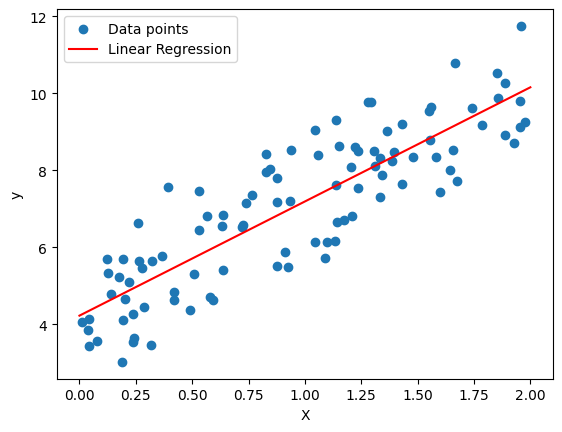

Slope (m): 2.968467510701019
Intercept (b): 4.222151077447231


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Feature (independent variable)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (dependent variable)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [2]])  # New data points
y_pred = model.predict(X_new)

# Visualize the data and the linear regression line
plt.scatter(X, y, label='Data points')
plt.plot(X_new, y_pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Display the model's coefficients
print(f'Slope (m): {model.coef_[0][0]}')
print(f'Intercept (b): {model.intercept_[0]}')


# AutoML Libraries:

**AutoSklearn**: An automated machine learning (AutoML) library that automates the process of selecting and tuning machine learning models.

**H2O.ai**: A platform for building and deploying machine learning models, which includes AutoML capabilities.

**suppervised learning**
# Linear regression
Linear regression is used for predicting a continuous target variable. It models the relationship between input features and the target variable as a linear equation.

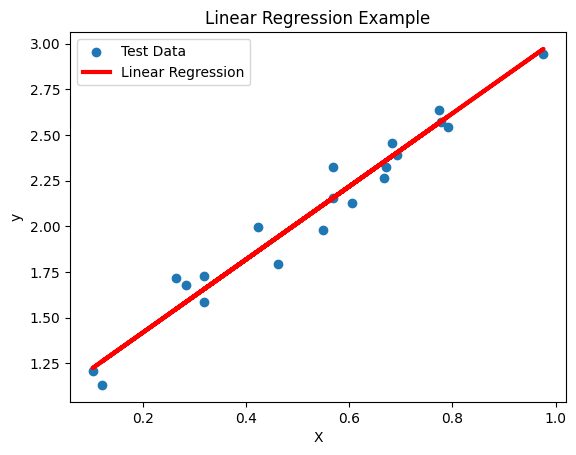

Coefficient (slope): 1.9980518202009776
Intercept: 1.0206340188711438


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1)  # Independent variable
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Dependent variable with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the original data and the linear regression line
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

# Print the coefficients of the linear regression model
print('Coefficient (slope):', model.coef_[0][0])
print('Intercept:', model.intercept_[0])


# Logistic Regression
 Logistic regression is used for binary classification tasks, where the goal is to classify data into one of two classes (e.g., spam or not spam).

Accuracy: 1.00
Confusion Matrix:
[[20  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



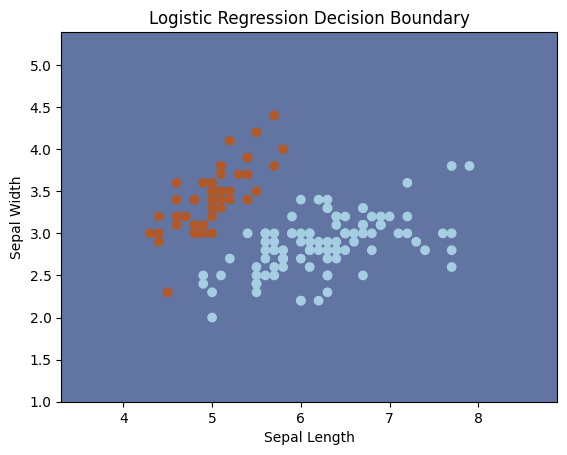

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We use only the first two features (sepal length and width)
y = (iris.target == 0).astype(int)  # 1 if Iris setosa, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression Decision Boundary')
plt.show()



# Decision Trees
Decision trees are used for both classification and regression tasks. They partition the data into subsets based on input features and make predictions at the leaf nodes.

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



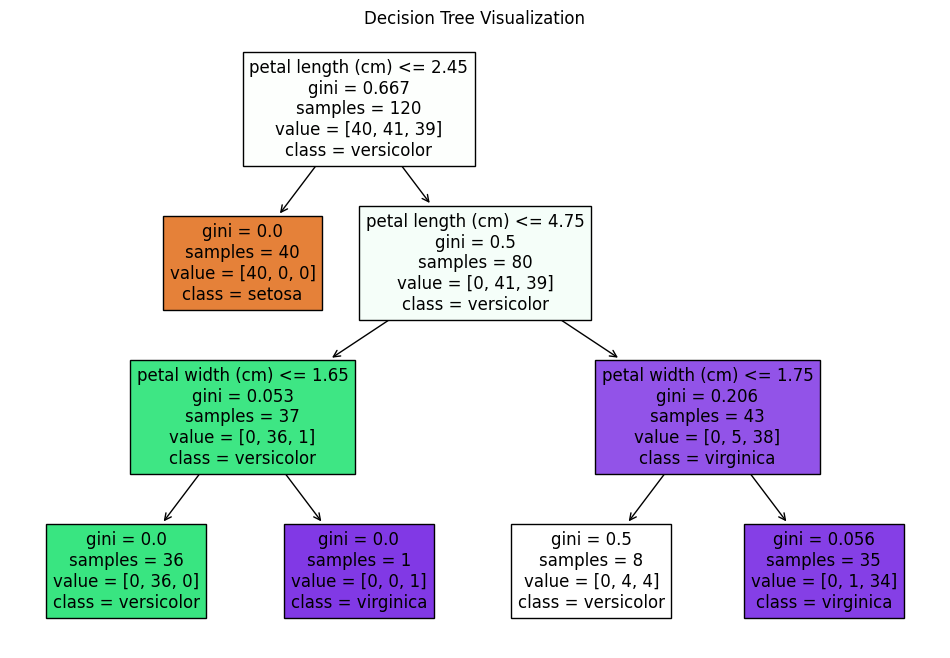

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Load the Iris dataset (or any other dataset of your choice)
iris = load_iris()
X = iris.data[:, 2:]  # Using only petal length and width for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)  # You can adjust the max_depth parameter for tree depth

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


# Random forest
 Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting.

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



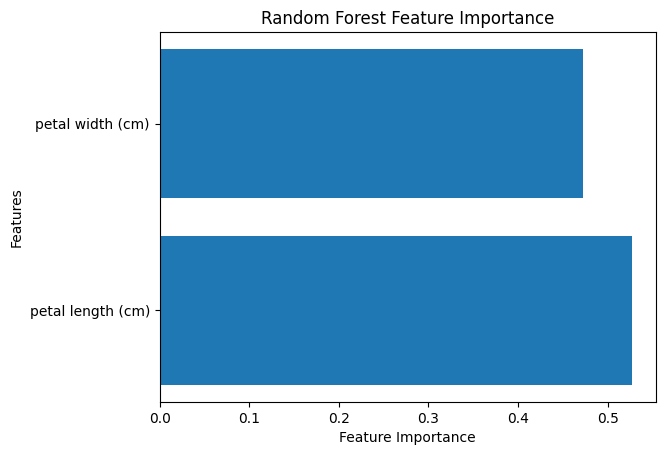

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset (or any other dataset of your choice)
iris = load_iris()
X = iris.data[:, 2:]  # Using only petal length and width for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Feature importance plot
feature_importance = model.feature_importances_
feature_names = iris.feature_names[2:]

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


## Support Vector Machines (SVM):
 SVM is a powerful classification algorithm that finds the hyperplane that best separates different classes in high-dimensional space.

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



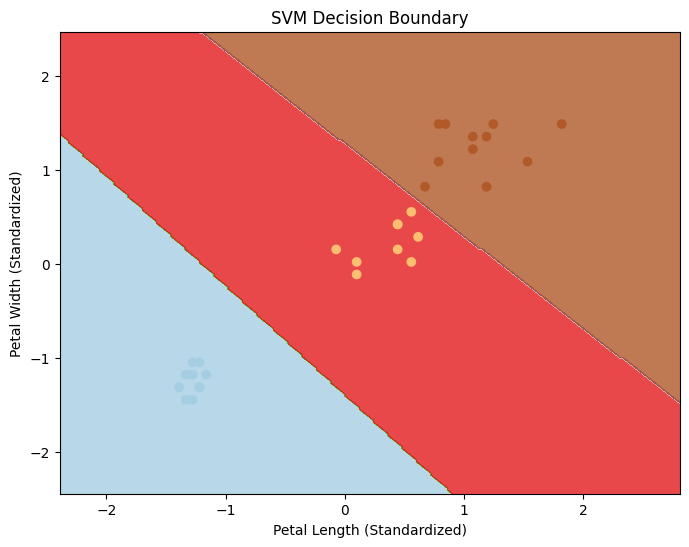

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (or any other dataset of your choice)
iris = load_iris()
X = iris.data[:, 2:]  # Using only petal length and width for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
model = SVC(kernel='linear', C=1.0)  # You can choose different kernels (e.g., 'linear', 'rbf') and adjust the regularization parameter (C)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot decision boundary
def plot_decision_boundary(X, y, model, ax):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_test, y_test, model, plt)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('SVM Decision Boundary')
plt.show()


## K-Nearest Neighbors (KNN):
 KNN is a simple and intuitive classification algorithm that assigns a class label based on the majority class among its k-nearest neighbors in the feature space.



Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



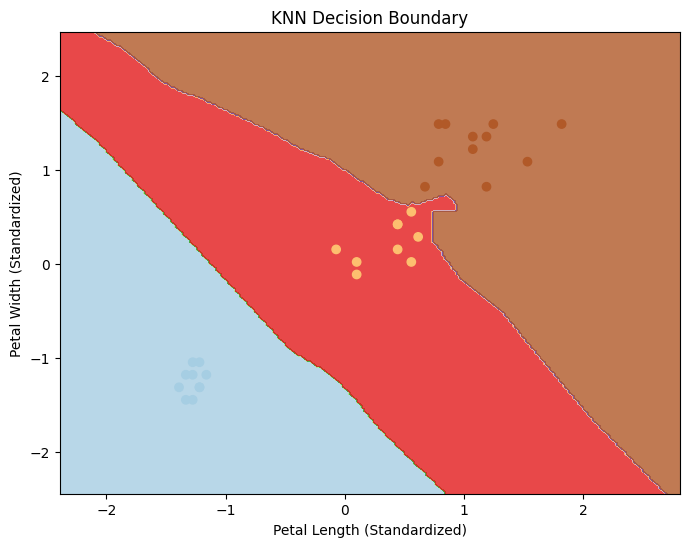

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (or any other dataset of your choice)
iris = load_iris()
X = iris.data[:, 2:]  # Using only petal length and width for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot decision boundary
def plot_decision_boundary(X, y, model, ax):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_test, y_test, model, plt)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('KNN Decision Boundary')
plt.show()


## Naive Bayes:
 Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It's often used in text classification and spam detection.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the 20 Newsgroups dataset (a popular text classification dataset)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Create a bag-of-words representation of the text data
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Apply TF-IDF transformation to the bag-of-words representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Create a Naive Bayes classifier (Multinomial Naive Bayes for text classification)
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.66
Confusion Matrix:
[[ 18   0   0   0   0   0   0   1   5   2   1   4   0   2   2 106   0  10
    0   0]
 [  0 124  14  17   0   8   1   0   7   0   1   7   0   0   3  18   0   2
    0   0]
 [  0  11 118  31   2   7   0   0   9   0   0   7   0   0   0  10   0   0
    0   0]
 [  0   6  16 142   3   0   3   0   1   0   0   3   2   1   0   6   0   0
    0   0]
 [  0   2   5  29 131   0   3   1  12   0   0   8   2   2   2   7   1   0
    0   0]
 [  0  14   9   3   1 174   0   1   2   0   1   3   0   0   2   5   0   0
    0   0]
 [  0   3   2  28   7   2 116   6   3   0   0   6   5   2   3   9   1   0
    0   0]
 [  0   0   0   0   1   1   2 143  12   0   2   6   3   1   2  20   2   1
    0   0]
 [  0   2   0   1   0   1   5   5 125   2   1   2   1   2   2  18   1   0
    0   0]
 [  0   0   0   0   0   1   0   0  10 163   9   2   0   0   0  25   0   1
    0   0]
 [  0   1   0   0   0   0   0   1   7   0 174   1   0   1   0  13   0   0
    0   0]
 [  0   3   3   0   0   1   0   

# Neural Networks:
Neural networks, including feedforward neural networks and deep learning models, are used for complex classification and regression tasks. They consist of multiple layers of interconnected nodes (neurons).

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
375/375 [==============================] - 12s 25ms/step - loss: 0.3035 - accuracy: 0.9129 - val_loss: 0.1617 - val_accuracy: 0.9531
Epoch 2/5
375/375 [==============================] - 5s 14ms/step - loss: 0.1253 - accuracy: 0.9633 - val_loss: 0.1161 - val_accuracy: 0.9661
Epoch 3/5
375/375 [==============================] - 6s 17ms/step - loss: 0.0815 - accuracy: 0.9760 - val_loss: 0.0951 - val_accuracy: 0.9724
Epoch 4/5
375/375 [==============================] - 5s 14ms/step - loss: 0.0593 - accuracy: 0.9831 - val_loss: 0.0900 - val_accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0791 - accuracy: 0.9754
Test accuracy: 0.98


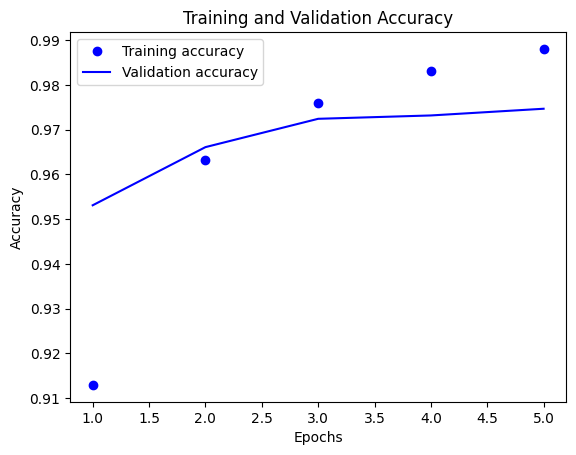

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Flatten the images from 28x28 to 784
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a sequential neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Plot the training and validation accuracy over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Neural Networks:
Neural networks, including feedforward neural networks and deep learning models, are used for complex classification and regression tasks. They consist of multiple layers of interconnected nodes (neurons).

Epoch 1/50
20/20 [==============================] - 2s 24ms/step - loss: 0.8028 - accuracy: 0.3125 - val_loss: 0.7520 - val_accuracy: 0.3625
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7419 - accuracy: 0.3516 - val_loss: 0.7047 - val_accuracy: 0.3875
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.4484 - val_loss: 0.6643 - val_accuracy: 0.5813
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.6344 - val_loss: 0.6296 - val_accuracy: 0.7000
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.8156 - val_loss: 0.5978 - val_accuracy: 0.8062
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5712 - accuracy: 0.8531 - val_loss: 0.5701 - val_accuracy: 0.8062
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5398 - accuracy: 0.8562 - val_loss: 0.5460 - val_accuracy: 0.8062
Epoch 8/50
20/20 [=

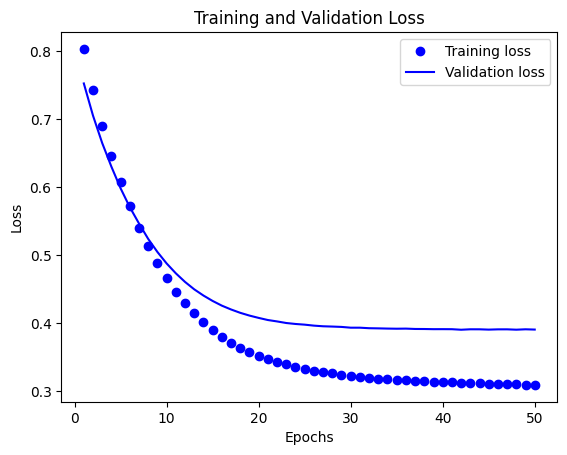

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a sequential neural network model
model = Sequential()

# Add an input layer with 2 input features and a hidden layer with 16 units and ReLU activation
model.add(Dense(16, input_dim=2, activation='relu'))

# Add an output layer with 1 unit and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Plot the training and validation loss over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## AdaBoost:
AdaBoost is an ensemble method that combines weak learners into a strong classifier by giving more weight to misclassified data points.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.91
Confusion Matrix:
[[89 12]
 [ 6 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       101
           1       0.89      0.94      0.91        99

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



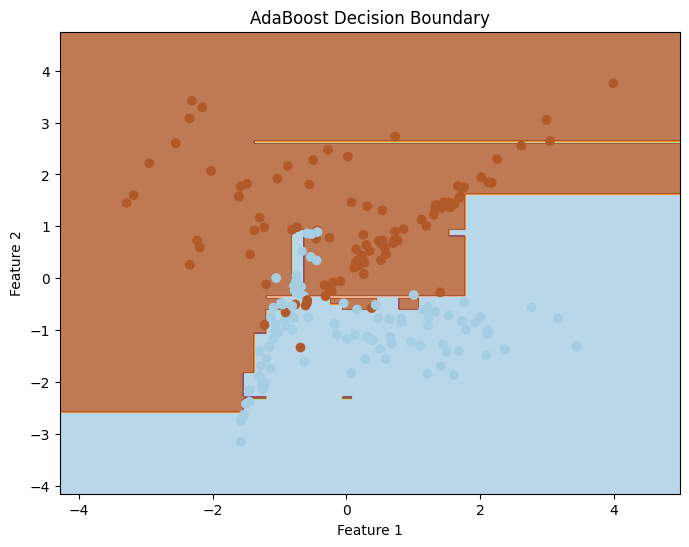

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a weak classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the weak classifier
model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot decision boundary
def plot_decision_boundary(X, y, model, ax):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_test, y_test, model, plt)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('AdaBoost Decision Boundary')
plt.show()


# Linear Discriminant Analysis (LDA)
 LDA is used for dimensionality reduction and classification tasks. It aims to maximize the separation between classes while minimizing the within-class variance.


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Transform the data to the LDA space
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Create a classifier (e.g., Logistic Regression) on the LDA-transformed data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', multi_class='auto')

# Fit the classifier to the LDA-transformed training data
classifier.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test data
y_pred = classifier.predict(X_test_lda)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.97
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# ElasticNet Regression:
 ElasticNet combines the L1 and L2 regularization methods with linear regression, providing a balance between feature selection and regularization.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset (a common dataset for regression)
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ElasticNet Regression model
alpha = 0.5  # Regularization parameter (a balance between L1 and L2)
l1_ratio = 0.5  # Mixing parameter for L1 and L2 penalties
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate metrics (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 5240.15
R-squared (R2): 0.01


# Ridge Regression
Ridge regression is a linear regression variant that uses L2 regularization to prevent overfitting by penalizing large coefficients.


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset as an example
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0  # Alpha parameter controls the strength of regularization (higher values mean stronger regularization)
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 3077.42
R-squared: 0.42


# Lasso regression
its a linear regression model with L1 regularization, which is used for feature selection and can set some feature coefficients to exactly zero.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset as an example
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
alpha = 1.0  # Alpha parameter controls the strength of regularization (higher values mean stronger regularization)
model = Lasso(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 3403.58
R-squared: 0.36


## Multi-class classification
it involves predicting one of several possible classes or categories for each data point. Here's an example of how to perform multi-class classification using three common algorithms: Logistic Regression, Random Forest, and Support Vector Machine (SVM) in Python with scikit-learn

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-Class Classification using Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Multi-Class Classification using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Multi-Class Classification using Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate and display results for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr, target_names=iris.target_names)

print("Logistic Regression:")
print(f'Accuracy: {accuracy_lr:.2f}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('Classification Report:')
print(class_report_lr)

# Evaluate and display results for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names)

print("\nRandom Forest:")
print(f'Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

# Evaluate and display results for Support Vector Machine (SVM)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, target_names=iris.target_names)

print("\nSupport Vector Machine (SVM):")
print(f'Accuracy: {accuracy_svm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)


Logistic Regression:
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest:
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Support Vector